In [22]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# initialize variables
n_simulations = 2000

In [24]:
# create lists to store needles
needles = []
crossed_count = 0

# Generate needles
for i in range(0, n_simulations):
    # establishing the first point and the angle

    x = np.random.uniform(1,4)
    y = np.random.uniform(1,4)
    theta = np.random.uniform(0,360)

    # defining end point

    x_end = x + np.sin(np.rad2deg(theta))
    y_end = y + np.cos(np.rad2deg(theta))

    # plt.plot([x, x_end], [y, y_end])

    # checking if it crossed a yard line
    if abs(int(x)-int(x_end))==1:
        crossed_count += 1

    new_needle = [x, y, x_end, y_end]
    # print(new_needle)
    needles.append(new_needle)


In [25]:
# Estimation of PI
pi_est = (2*n_simulations)/crossed_count

pi = np.pi

diff=pi_est-np.pi


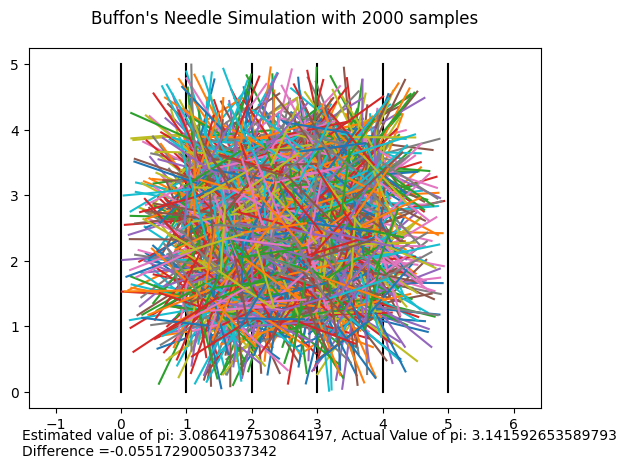

In [26]:
# animate plot

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable="datalim")

fig.suptitle(f"Buffon's Needle Simulation with {n_simulations} samples")

# Adjust the margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)

text = f"Estimated value of pi: {pi_est}, Actual Value of pi: {pi}\nDifference ={diff}"
fig.text(0.09, 0.05, text)

# Plot wooden strips
def init():
    strips = [
        [[0,0],[0,5]],
        [[1,1],[0,5]],
        [[2,2],[0,5]],
        [[3,3],[0,5]],
        [[4,4],[0,5]],
        [[5,5],[0,5]],
        ]
    for s in strips:
        plt.plot(s[0],s[1],'k-')

def animate(i):
    x1 = needles[i][0]
    y1 = needles[i][1]
    x2 = needles[i][2]
    y2 = needles[i][3]
    plt.plot([x1, x2], [y1, y2])        

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=1, save_count=n_simulations)
ani.save("buffons_needle.gif")

plt.show()